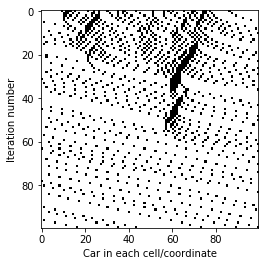

In [49]:
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

class trafficsimulation:
  """
  Traffic Simulation class initialized with a few properties you can assign
  road_length = Length of your highway
  density = Density of cars in the road
  max_Velocity = Maximum velocity for the highway
  slow_prob = Probability of slowing down
  """
  def __init__(self, road_length,density,max_velocity,slow_prob):
    self.road_length = road_length
    self.density = density
    self.max_velocity = max_velocity
    self.slow_prob = slow_prob
    self.road = [-1 for x in range(self.road_length)]
  
  #Make the highway
  def initialize(self):
    for i in range(len(self.road)):
      if random.random() <= self.density:
        self.road[i] = 0
        
  def update(self):
    #Loop through highway
    for i in range(len(self.road)):
      
      #Check if there's a car that isn't at maximum velocity
      if self.road[i] != -1 and self.road[i] != self.max_velocity:
        
        #Accelerate by 1
        self.road[i] = self.road[i] + 1
        
        #Check for periodic boundary condition
        if self.road[i] >= self.road_length - (i+1):
            
          #check for cars in front of you, if there is one, then reduce speed
          for x in range(i+1,i+1+self.road[i]):
            if x >= self.road_length:
              if self.road[(x % self.road_length)] != -1:
                self.road[i] = self.road_length + ((x % self.road_length) - i - 1)
                break
              
            elif self.road[x] != -1:
              self.road[i] = x-i-1
              break
              
        #Without periodic boundary conditions      
        else:          
          #check for cars in front of you, if there is one, then reduce speed
          for x in range(i+1,i+1+self.road[i]):
            if self.road[x] != -1:
              self.road[i] = x-i-1
              break
              
    #Random slow down
    for i in range(len(self.road)):
      if self.road[i] != -1 and self.road[i] != 0:
        if random.random() <= self.slow_prob:
          self.road[i] = self.road[i] - 1
    
    #Do actual updating after calculating all the speeds
    state_copy = deepcopy(self.road)
    for i in range(len(state_copy)):
      if state_copy[i] != -1 and state_copy[i] != 0:
        #Check for periodic boundary condition
        if i+state_copy[i] >= self.road_length:
          self.road[((i+state_copy[i]) % self.road_length)] = state_copy[i]
          self.road[i] = -1
        else:
          self.road[i+state_copy[i]] = state_copy[i]
          self.road[i] = -1


          



#Run simulation

cars_crossed = 0
simulation = []

#Change second parameter here to change densities
x = trafficsimulation(100,0.2,5,0.3)
x.initialize()

#plot simulation
for i in range(100):
  one_row = []
  x.update()
  for j in x.road:
    if j == -1:
      one_row.append(0)
    else:
      one_row.append(1)
  simulation.append(one_row)

plt.xlabel("Car in each cell/coordinate")
plt.ylabel("Iteration number")
plt.imshow(simulation, cmap="Greys", interpolation="nearest")
plt.show() 






    
    
    
  

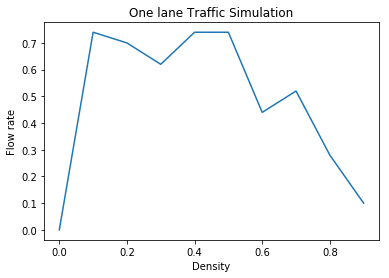

In [57]:
#plot flow rate vs density
#Assume that the periodic boundaries are the end points for our traffic flow data collection

flow_rate = []
for i in np.arange(0,1,0.1):
  sim = trafficsimulation(100,i,5,0.3)
  sim.initialize()
  cars_crossed = 0
  for x in range(100):
  
    #Check if cars will flow in/out
    #Since our max_velocity is 5, we use this specific range
    for k in range(94,100):
      if sim.road[k] + k >= 100:
        cars_crossed += 2
    sim.update()   
  flow_rate.append(cars_crossed/100)
  
plt.title("One lane Traffic Simulation")
plt.xlabel("Density")
plt.ylabel("Flow rate")  
  
plt.plot([i for i in np.arange(0,1,0.1)], flow_rate)

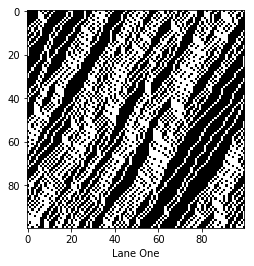

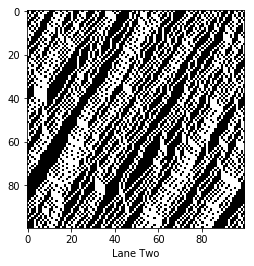

In [58]:
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

class twolane_trafficsimulation:
  """
  Two Lane Traffic Simulation class initialized with a few properties you can assign
  road_length = Length of your highway
  density = Density of cars in the road
  max_Velocity = Maximum velocity for the highway
  slow_prob = Probability of slowing down
  lane_prob = Probability of switching lanes
  """
  def __init__(self, road_length,density,max_velocity,slow_prob, lane_prob):
    self.road_length = road_length
    self.density = density
    self.max_velocity = max_velocity
    self.slow_prob = slow_prob
    self.lane_prob = lane_prob
    self.lane_1 = [-1 for x in range(self.road_length)]
    self.lane_2 = [-1 for x in range(self.road_length)]
  
  #Make the highway
  def initialize(self):
    for i in range(len(self.lane_1)):
      if random.random() <= self.density:
        self.lane_1[i] = 0
        
    for i in range(len(self.lane_2)):
      if random.random() <= self.density:
        self.lane_2[i] = 0
   
  def update(self):
    
    #Update lane_1 first
    
    #I thought the boundary condition method I used before was very tedious, so I sat down and came up with a less tedious way using modulus
    lane_1_copy = deepcopy(self.lane_1)
    lane_2_copy = deepcopy(self.lane_2)
    
    
    
    for i in range(len(lane_1_copy)):
      front_empty = True
      side_empty = True
      sidefront_empty = True
      sideback_empty = True
      #Check if there's a car that isn't at maximum velocity
      if lane_1_copy[i] != -1 and lane_1_copy[i] != self.max_velocity:
        #Check ahead of car
        for x in range(i+1,i+lane_1_copy[i]+2):
          if lane_1_copy[x%len(lane_1_copy)] != -1:
            front_empty = False
            break
        #Check on the same cell on the other lane
        if lane_2_copy[i] != -1:
          side_empty = False
        
        #Check ahead in other lane
        for x in range(i+1,i+lane_1_copy[i]+2):
          if lane_2_copy[x%len(lane_2_copy)] != -1:
            sidefront_empty = False
            break
        #Check behind in other lane
        for x in range(i-1,i-self.max_velocity-1, -1):
          if lane_2_copy[x%len(lane_2_copy)] != -1:
            sideback_empty = False
            break  
        if front_empty == False and side_empty == True and sidefront_empty == True and sideback_empty == True and random.random() <= self.lane_prob:
          self.lane_2[i] = lane_1_copy[i]
          self.lane_1[i] = -1
    
        
    #Update lane 2
    
    
  
    for i in range(len(lane_2_copy)):
      front_empty = True
      side_empty = True
      sidefront_empty = True
      sideback_empty = True
      #Check if there's a car that isn't at maximum velocity
      if lane_2_copy[i] != -1 and lane_2_copy[i] != self.max_velocity:
        #Check ahead of car
        for x in range(i+1,i+lane_2_copy[i]+2):
          if lane_2_copy[x%len(lane_2_copy)] != -1:
            front_empty = False
            break
        #Check on the same cell on the other lane
        if lane_1_copy[i] != -1:
          side_empty = False       
        #Check ahead in other lane
        for x in range(i+1,i+lane_2_copy[i]+2):
          if lane_1_copy[x%len(lane_1_copy)] != -1:
            sidefront_empty = False
            break
        #Check behind in other lane
        for x in range(i-1,i-self.max_velocity-1, -1):
          if lane_1_copy[x%len(lane_1_copy)] != -1:
            sideback_empty = False
            break  
        if front_empty == False and side_empty == True and sidefront_empty == True and sideback_empty == True and random.random() <= self.lane_prob:
          self.lane_1[i] = lane_2_copy[i]
          self.lane_2[i] = -1
       
        
    #Do the individual updating of each lane by applying the rules in Part 1
    
    #First for lane 1
    for i in range(len(self.lane_1)):
      
      #Check if there's a car that isn't at maximum velocity
      if self.lane_1[i] != -1 and self.lane_1[i] != self.max_velocity:
        
        #Accelerate by 1
        self.lane_1[i] = self.lane_1[i] + 1
        
        #Check for periodic boundary condition
        if self.lane_1[i] >= self.road_length - (i+1):
            
          #check for cars in front of you, if there is one, then reduce speed
          for x in range(i+1,i+1+self.lane_1[i]):
            if x >= self.road_length:
              if self.lane_1[(x % self.road_length)] != -1:
                self.lane_1[i] = self.road_length + ((x % self.road_length) - i - 1)
                break
              
            elif self.lane_1[x] != -1:
              self.lane_1[i] = x-i-1
              break
              
        #Without periodic boundary conditions      
        else:          
          #check for cars in front of you, if there is one, then reduce speed
          for x in range(i+1,i+1+self.lane_1[i]):
            if self.lane_1[x] != -1:
              self.lane_1[i] = x-i-1
              break
              
    #Random slow down
    for i in range(len(self.lane_1)):
      if self.lane_1[i] != -1 and self.lane_1[i] != 0:
        if random.random() <= self.slow_prob:
          self.lane_1[i] = self.lane_1[i] - 1

    
    #Do actual updating after calculating all the speeds
    state_copy = deepcopy(self.lane_1)
    for i in range(len(state_copy)):
      if state_copy[i] != -1 and state_copy[i] != 0:
        #Check for periodic boundary condition
        if i+state_copy[i] >= self.road_length:
          self.lane_1[((i+state_copy[i]) % self.road_length)] = state_copy[i]
          self.lane_1[i] = -1
        else:
          self.lane_1[i+state_copy[i]] = state_copy[i]
          self.lane_1[i] = -1
     
    #Now update lane 2
    for i in range(len(self.lane_2)):
      
      #Check if there's a car that isn't at maximum velocity
      if self.lane_2[i] != -1 and self.lane_2[i] != self.max_velocity:
        
        #Accelerate by 1
        self.lane_2[i] = self.lane_2[i] + 1
        
        #Check for periodic boundary condition
        if self.lane_2[i] >= self.road_length - (i+1):
            
          #check for cars in front of you, if there is one, then reduce speed
          for x in range(i+1,i+1+self.lane_2[i]):
            if x >= self.road_length:
              if self.lane_2[(x % self.road_length)] != -1:
                self.lane_2[i] = self.road_length + ((x % self.road_length) - i - 1)
                break
              
            elif self.lane_2[x] != -1:
              self.lane_2[i] = x-i-1
              break
              
        #Without periodic boundary conditions      
        else:          
          #check for cars in front of you, if there is one, then reduce speed
          for x in range(i+1,i+1+self.lane_2[i]):
            if self.lane_2[x] != -1:
              self.lane_2[i] = x-i-1
              break
              
    #Random slow down
    for i in range(len(self.lane_2)):
      if self.lane_2[i] != -1 and self.lane_2[i] != 0:
        if random.random() <= self.slow_prob:
          self.lane_2[i] = self.lane_2[i] - 1

    
    #Do actual updating after calculating all the speeds
    state_copy = deepcopy(self.lane_2)
    for i in range(len(state_copy)):
      if state_copy[i] != -1 and state_copy[i] != 0:
        #Check for periodic boundary condition
        if i+state_copy[i] >= self.road_length:
          self.lane_2[((i+state_copy[i]) % self.road_length)] = state_copy[i]
          self.lane_2[i] = -1
        else:
          self.lane_2[i+state_copy[i]] = state_copy[i]
          self.lane_2[i] = -1
          

#Run Simulation

lane_one = []
lane_two = []

#Change second parameter here to change density
x = twolane_trafficsimulation(100,0.5,5,0.3,0.8)
x.initialize()

#plot simulation
for i in range(100):
  one_row = []
  two_row = []
  x.update()
  for j in x.lane_1:
    if j == -1:
      one_row.append(0)
    else:
      one_row.append(1)
  lane_one.append(one_row)
  for k in x.lane_2:
    if k == -1:
      two_row.append(0)
    else:
      two_row.append(1)
  lane_two.append(two_row)

plt.xlabel("Lane One")
plt.imshow(lane_one, cmap="Greys", interpolation="nearest")
plt.show() 

plt.xlabel("Lane Two")
plt.imshow(lane_two, cmap="Greys", interpolation="nearest")
plt.show()



  

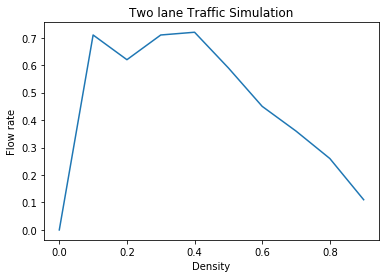

In [103]:
#plot flow rate vs density
flow_rate = []
for i in np.arange(0,1,0.1):
  sim = twolane_trafficsimulation(100,i,5,0.3,0.8)
  sim.initialize()
  cars_crossed = 0
  for x in range(100):
  
    #Check if cars will flow in/out
    #Since our max_velocity is 5, we use this specific range
    for k in range(94,100):
      if sim.lane_1[k] + k >= 100:
        cars_crossed += 2
      if sim.lane_2[k] + k >= 100:
        cars_crossed += 2
    sim.update()   
  flow_rate.append(cars_crossed/200)
  
plt.title("Two lane Traffic Simulation")
plt.xlabel("Density")
plt.ylabel("Flow rate")  
  
plt.plot([i for i in np.arange(0,1,0.1)], flow_rate)

